### DARWIN Topology Plotter V.2.X

(by Fabian Kuger, Mar2020) 

This notebook is a tool for event-by-event visualization of energy depositions produced with the DARWING4 MonteCarlo Framework. It accesses data before (Geant4 .root output) and after Procssing (MCProc _proc.root output). 

The code has last been updated / checked for compatibility with DarwinG4 V?.? and MCProcessor V2.0.


In [452]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.patches import Ellipse
from matplotlib import cm
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm
from collections import Counter
import ROOT
import root_numpy
import math
import scipy.integrate



In [453]:

def get_raw(filename):
    f = ROOT.TFile(filename)
    tree = f.Get('events/events')
    out=root_numpy.tree2array(tree)
    x=np.array([out['xp'][i] for i in range(len(out['xp']))])
    y=np.array([out['yp'][i] for i in range(len(out['yp']))])
    z=np.array([out['zp'][i] for i in range(len(out['zp']))])
    ed=np.array([out['ed'][i] for i in range(len(out['ed']))])
    x_pri=([out['xp_pri']])
    y_pri=([out['yp_pri']])
    z_pri=([out['zp_pri']])
    return x, y, z, ed, x_pri, y_pri, z_pri


In [454]:
def get_proc(filename):
    f = ROOT.TFile(filename)
    tree = f.Get('events')
    out=root_numpy.tree2array(tree)
    # Cluster position & Energy
    x=np.array([out['Xp'][i] for i in range(len(out['Xp']))])
    y=np.array([out['Yp'][i] for i in range(len(out['Yp']))])
    z=np.array([out['Zp'][i] for i in range(len(out['Zp']))])
    ed=np.array([out['Etot'][i] for i in range(len(out['Etot']))])
    n_scat=([out['nScat']])
    # PreCluster position & Energy
    x_PreCl=np.array([out['Xp_PreCl'][i] for i in range(len(out['Xp_PreCl']))])
    y_PreCl=np.array([out['Yp_PreCl'][i] for i in range(len(out['Yp_PreCl']))])
    z_PreCl=np.array([out['Zp_PreCl'][i] for i in range(len(out['Zp_PreCl']))])
    ed_PreCl=np.array([out['Etot_PreCl'][i] for i in range(len(out['Etot_PreCl']))])
    x_PreCl_rms=np.array([out['Xp_RMS_PreCl'][i] for i in range(len(out['Xp_RMS_PreCl']))])
    y_PreCl_rms=np.array([out['Yp_RMS_PreCl'][i] for i in range(len(out['Yp_RMS_PreCl']))])
    z_PreCl_rms=np.array([out['Zp_RMS_PreCl'][i] for i in range(len(out['Zp_RMS_PreCl']))])
    n_scat_PreCl=([out['nScat_PreCl']])
    # Primary interaction position & Energy 
    x_pri=([out['xpri']])
    y_pri=([out['ypri']])
    z_pri=([out['zpri']])

    return x, y, z, ed,n_scat, x_PreCl, y_PreCl, z_PreCl, ed_PreCl, x_PreCl_rms, y_PreCl_rms, z_PreCl_rms, n_scat_PreCl, x_pri, y_pri, z_pri


In [455]:
filename_core = 'Topology_gamma_2458keV_100_HighRes'

#filename_core = 'Topology_0vbb_2x1229keV_100_HighRes'
#filename_core = 'Topology_electron_2458keV_100_HighRes'
#filename_core = 'Topology_0v2EC_100'

filename_raw = filename_core + '.root'
print(filename_raw)
filename_proc = filename_core + '_Proc.root'
print(filename_proc)


Topology_gamma_2458keV_100_HighRes.root
Topology_gamma_2458keV_100_HighRes_Proc.root


In [354]:
cd /userdata/fkuger/0vbb_data/0vbb_Topology


/userdata/fkuger/0vbb_data/0vbb_Topology


In [355]:
### Load the data from files

x,y,z,ed, x_start, y_start, z_start = get_raw(filename_raw)
x_start, y_start, z_start = np.asarray(x_start), np.asarray(y_start), np.asarray(z_start)
X_cl, Y_cl, Z_cl, Etot_cl, N_scat, X_PreCl, Y_PreCl, Z_PreCl, Etot_PreCl, X_PreCl_rms, Y_PreCl_rms, Z_PreCl_rms, N_scat_PreCl, X_pri, Y_pri, Z_pri = get_proc(filename_proc)


### Plot  Topology - Displays for selected events
- Define event number range prior to execution


Event 31 with 2 Clusters and 3 PreClusters


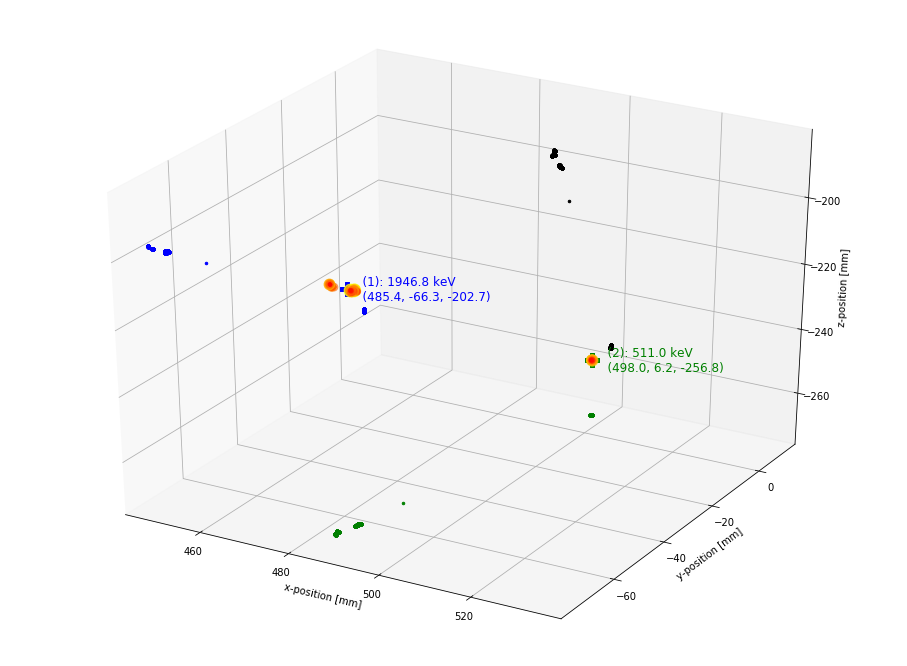

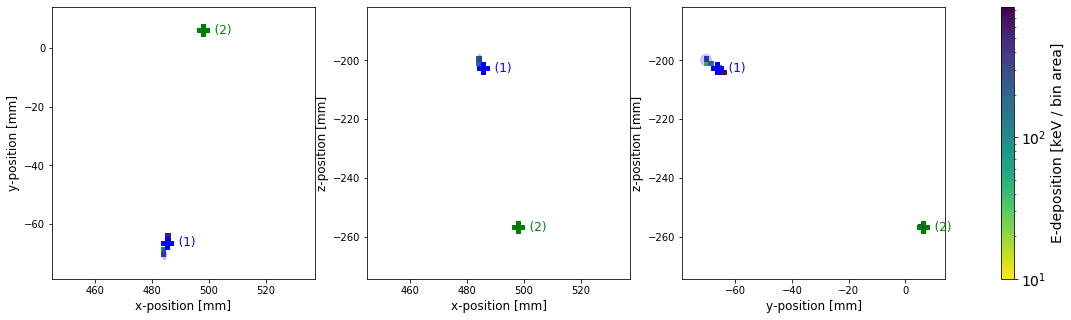

>>> Printing detailed Projections per PreCluster 
PreCluster 0 at position (485.8,-64.9, -203.7) with 1435.8 keV


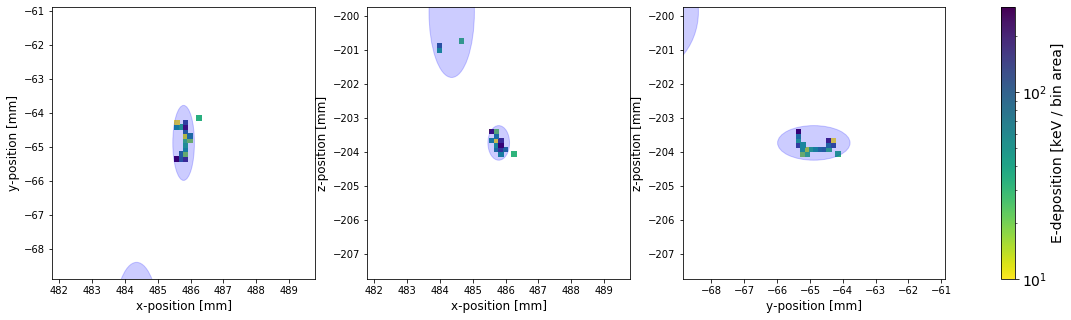

PreCluster 1 at position (484.4,-70.3, -199.9) with 511.0 keV


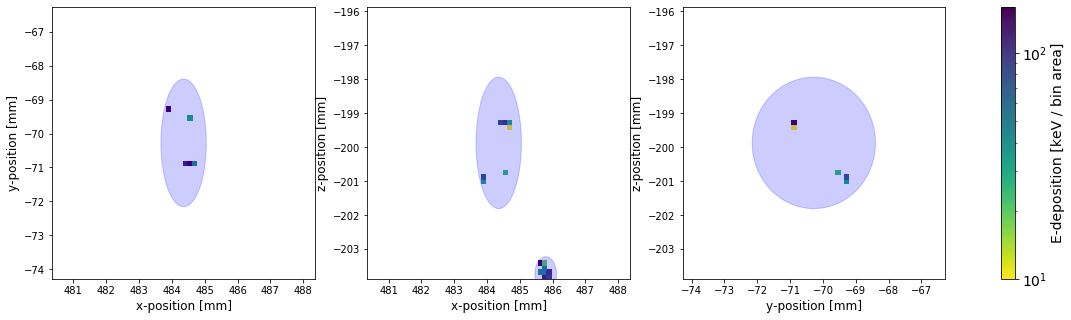

PreCluster 2 at position (498.0,6.2, -256.8) with 511.0 keV


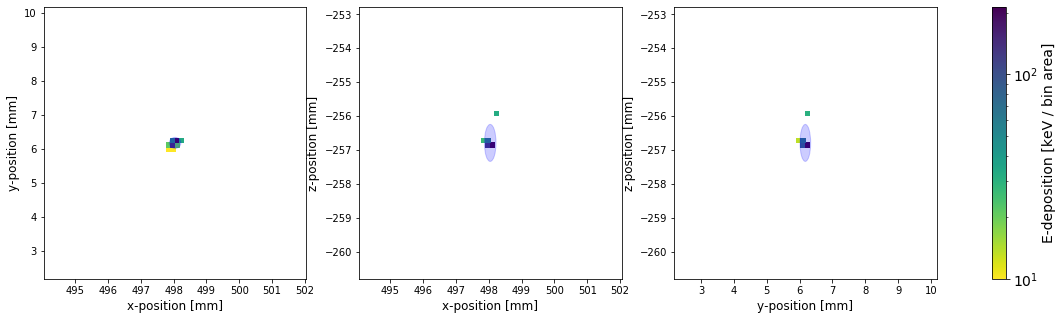

In [457]:
### Select event number

#i = 92
i = np.int(np.random.uniform(low=0, high= 100, size =1))


### Set Printing flags

ClusterMarker = 'True'
ClusterInfo = 'True'

PreCluster_Bounds = 'False'
PreCluster_RMS = 'True'
PreCluster_Details = 'True'

### Define Plotting parameters: 

bins = 60
zoom_factor = 0.6
Cluster_Color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

Eps_PreCl = 3
Eps_Cl_xy = 40

max_extend =  np.amax((np.abs(np.amax(x[i])-np.amin(x[i])), np.abs(np.amax(y[i])-np.amin(y[i])), np.abs(np.amax(z[i])-np.amin(z[i])), 10))

xlim_low, xlim_high = (np.amin(x[i])+ np.amax(x[i]))/2-zoom_factor*max_extend, (np.amin(x[i])+ np.amax(x[i]))/2+zoom_factor*max_extend 
ylim_low, ylim_high = (np.amin(y[i])+ np.amax(y[i]))/2-zoom_factor*max_extend, (np.amin(y[i])+ np.amax(y[i]))/2+zoom_factor*max_extend
zlim_low, zlim_high = (np.amin(z[i])+ np.amax(z[i]))/2-zoom_factor*max_extend, (np.amin(z[i])+ np.amax(z[i]))/2+zoom_factor*max_extend

### Plot 3D view
PrintEvent3D()
    
### Plot ClusterOverview in Projections
PrintClusterOverview()
    
### Plot all PreClusters in Detail
if (PreCluster_Details == 'True'): PrintPreClusterDetails()        


In [438]:
def PrintPreClusterDetails():
    Colormap =  'viridis_r'
    
    print('>>> Printing detailed Projections per PreCluster ')
    for j in range(0, len(X_PreCl[i])): 
        
        print(f'PreCluster {j} at position ({X_PreCl[i][j]:.1f},{Y_PreCl[i][j]:.1f}, {Z_PreCl[i][j]:.1f}) with {Etot_PreCl[i][j]:.1f} keV')
        fig, axes = plt.subplots(figsize = (20,5), nrows=1, ncols=3)
        
        Windowsize = np.amax([8, 6*X_PreCl_rms[i][j], 6*Y_PreCl_rms[i][j], 6*Z_PreCl_rms[i][j]])
        
        counts, xedges, yedges, im = axes[0].hist2d(x[i], y[i], weights=ed[i], cmin=1, cmap = Colormap, range=[[X_PreCl[i][j]-Windowsize/2, X_PreCl[i][j]+Windowsize/2],[Y_PreCl[i][j]-Windowsize/2, Y_PreCl[i][j]+Windowsize/2]], bins = bins, norm=LogNorm(vmin=10))
        axes[1].hist2d(x[i], z[i], weights=ed[i], cmin=1, cmap = Colormap, range=[[X_PreCl[i][j]-Windowsize/2, X_PreCl[i][j]+Windowsize/2],[Z_PreCl[i][j]-Windowsize/2, Z_PreCl[i][j]+Windowsize/2]], bins = bins, norm=LogNorm(vmin=10))
        axes[2].hist2d(y[i], z[i], weights=ed[i], cmin=1, cmap = Colormap, range=[[Y_PreCl[i][j]-Windowsize/2, Y_PreCl[i][j]+Windowsize/2],[Z_PreCl[i][j]-Windowsize/2, Z_PreCl[i][j]+Windowsize/2]], bins = bins, norm=LogNorm(vmin=10))
                
        axes[0].set_xlabel('x-position [mm]', fontsize=12)
        axes[0].set_ylabel('y-position [mm]', fontsize=12)    
        axes[1].set_xlabel('x-position [mm]', fontsize=12)
        axes[1].set_ylabel('z-position [mm]', fontsize=12) 
        axes[2].set_xlabel('y-position [mm]', fontsize=12)
        axes[2].set_ylabel('z-position [mm]', fontsize=12) 
        
        
        if (PreCluster_Bounds == 'True'):
            for k in range(0, len(x[i])):
                circle=plt.Circle((x[i][k],y[i][k]), Eps_PreCl, color='r', fill=0, linestyle='-', alpha = 0.002)
                axes[0].add_artist(circle)
                circle=plt.Circle((x[i][k],z[i][k]), Eps_PreCl, color='r', fill=0, linestyle='-', alpha = 0.002)
                axes[1].add_artist(circle)
                circle=plt.Circle((y[i][k],z[i][k]), Eps_PreCl, color='r', fill=0, linestyle='-', alpha = 0.002)
                axes[2].add_artist(circle)

        if (PreCluster_RMS == 'True'):
            for j in range(0, len(X_PreCl[i])):
                ellipse = Ellipse((X_PreCl[i][j], Y_PreCl[i][j]), 5*X_PreCl_rms[i][j], 5*Y_PreCl_rms[i][j], angle=0, alpha=0.2, color='b', fill='true', label = r'5$\sigma$ PreCluster Ellipse')
                axes[0].add_artist(ellipse)
                ellipse = Ellipse((X_PreCl[i][j], Z_PreCl[i][j]), 5*X_PreCl_rms[i][j], 5*Z_PreCl_rms[i][j], angle=0, alpha=0.2, color='b', fill='true', label = r'5$\sigma$ PreCluster Ellipse')
                axes[1].add_artist(ellipse)
                ellipse = Ellipse((Y_PreCl[i][j], Z_PreCl[i][j]), 5*Y_PreCl_rms[i][j], 5*Z_PreCl_rms[i][j], angle=0, alpha=0.2, color='b', fill='true', label = r'5$\sigma$ PreCluster Ellipse')
                axes[2].add_artist(ellipse)
        
        
        cbar = plt.colorbar(im, ax=axes)
        cbar.ax.tick_params(labelsize=14) 
        cbar.set_label( label='E-deposition [keV / bin area]', size=14) 
        
        plt.show()
    
    
    return

In [450]:
def PrintClusterOverview(): 
    Colormap =  'viridis_r'
    
    fig, axes = plt.subplots(figsize = (20,5), nrows=1, ncols=3)

    counts, xedges, yedges, im = axes[0].hist2d(x[i], y[i], weights=ed[i], cmin=1, cmap = Colormap, range=[[xlim_low, xlim_high],[ylim_low, ylim_high]], bins = bins, norm=LogNorm(vmin=10))
    axes[0].set_xlabel('x-position [mm]', fontsize=12)
    axes[0].set_ylabel('y-position [mm]', fontsize=12)

    axes[1].hist2d(x[i], z[i], weights=ed[i], cmin=1, cmap = Colormap, range=[[xlim_low, xlim_high],[zlim_low, zlim_high]], bins = bins, norm=LogNorm(vmin=10))
    axes[1].set_xlabel('x-position [mm]', fontsize=12)
    axes[1].set_ylabel('z-position [mm]', fontsize=12)

    axes[2].hist2d(y[i], z[i], weights=ed[i], cmin=1, cmap = Colormap, range=[[ylim_low, ylim_high],[zlim_low, zlim_high]], bins = bins, norm=LogNorm(vmin=10))
    axes[2].set_xlabel('y-position [mm]', fontsize=12)
    axes[2].set_ylabel('z-position [mm]', fontsize=12)


    if (PreCluster_RMS == 'True'):
        for j in range(0, len(X_PreCl[i])):
            ellipse = Ellipse((X_PreCl[i][j], Y_PreCl[i][j]), 5*X_PreCl_rms[i][j], 5*Y_PreCl_rms[i][j], angle=0, alpha=0.2, color='b', fill='true', label = r'5$\sigma$ PreCluster Ellipse')
            axes[0].add_artist(ellipse)
            ellipse = Ellipse((X_PreCl[i][j], Z_PreCl[i][j]), 5*X_PreCl_rms[i][j], 5*Z_PreCl_rms[i][j], angle=0, alpha=0.2, color='b', fill='true', label = r'5$\sigma$ PreCluster Ellipse')
            axes[1].add_artist(ellipse)
            ellipse = Ellipse((Y_PreCl[i][j], Z_PreCl[i][j]), 5*Y_PreCl_rms[i][j], 5*Z_PreCl_rms[i][j], angle=0, alpha=0.2, color='b', fill='true', label = r'5$\sigma$ PreCluster Ellipse')
            axes[2].add_artist(ellipse)

        
    if (ClusterMarker == 'True'): 
        for j in range(0, len(X_cl[i])):  
            axes[0].scatter(X_cl[i][j], Y_cl[i][j], c = Cluster_Color[j%7] , marker = 'P', s = 150)
            axes[0].text(X_cl[i][j], Y_cl[i][j], f'   ({j+1})',  va = 'center', c = Cluster_Color[j%7], fontsize = 12)
            axes[1].scatter(X_cl[i][j], Z_cl[i][j], c = Cluster_Color[j%7] , marker = 'P', s = 150)
            axes[1].text(X_cl[i][j], Z_cl[i][j], f'   ({j+1})',  va = 'center', c = Cluster_Color[j%7], fontsize = 12)
            axes[2].scatter(Y_cl[i][j], Z_cl[i][j], c = Cluster_Color[j%7] , marker = 'P', s = 150)
            axes[2].text(Y_cl[i][j], Z_cl[i][j], f'   ({j+1})',  va = 'center', c = Cluster_Color[j%7], fontsize = 12)

    cbar = plt.colorbar(im, ax=axes)
    cbar.ax.tick_params(labelsize=14) 
    cbar.set_label( label='E-deposition [keV / bin area]', size=14) 

    plt.show()
        
    
    return

In [446]:
def PrintEvent3D():
    Colormap =  'autumn'

    print(f'Event {i} with {len(X_cl[i])} Clusters and {len(X_PreCl[i])} PreClusters')

    fig = plt.figure(figsize=(16,12))
    ax = fig.gca( projection='3d')

    ax.scatter(x[i], y[i], z[i], c= np.abs(ed[i]),cmap = Colormap, s = np.abs(ed[i])* 5, alpha = 0.5 )

    if (ClusterMarker == 'True'): 
        for j in range(0, len(X_cl[i])):
            ax.scatter(X_cl[i][j], Y_cl[i][j], Z_cl[i][j], c = Cluster_Color[j%7] , marker = 'P', s = 200)

    if (ClusterInfo == 'True'): 
        for j in range(0, len(X_cl[i])):
            ax.text(X_cl[i][j], Y_cl[i][j], Z_cl[i][j], f'    ({j+1}): {Etot_cl[i][j]:.1f} keV \n    ({X_cl[i][j]:.1f}, {Y_cl[i][j]:.1f}, {Z_cl[i][j]:.1f})',  va = 'center', c = Cluster_Color[j%7], fontsize = 12)

    
    ax.set_xlim(xlim_low, xlim_high)
    ax.set_ylim(ylim_low, ylim_high)
    ax.set_zlim(zlim_low, zlim_high)

    ax.plot(x[i], z[i], 'k.', zdir='y', zs=(np.amin(y[i])+ np.amax(y[i]))/2+zoom_factor*max_extend, markersize = 5)
    ax.plot(y[i], z[i], 'b.', zdir='x', zs=(np.amin(x[i])+ np.amax(x[i]))/2-zoom_factor*max_extend, markersize = 5)
    ax.plot(x[i], y[i], 'g.', zdir='z', zs=(np.amin(z[i])+ np.amax(z[i]))/2-zoom_factor*max_extend, markersize = 5)

    ax.set_xlabel('x-position [mm]')
    ax.set_ylabel('y-position [mm]')
    ax.set_zlabel('z-position [mm]')

    plt.show()

    return
